In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read csv data, set index using "Date" column
ccy = pd.read_csv('../data/ccy1996_to_2023(c).csv')
ccy.set_index('Date', inplace=True)

# filter data start from 2002, as it is the end of a bear market
# change weekly data into week-on-week return data
ccy_r = ccy[313:].pct_change().dropna()
ccy_r.head()

,USDAUD,USDNZD,USDEUR,USDGBP,USDCAD,USDCHF,USDJPY,AUDNZD,EURAUD,GBPAUD,...,EURGBP,EURCAD,EURCHF,EURJPY,GBPCAD,GBPCHF,GBPJPY,CADCHF,CADJPY,CHFJPY
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-11,0.000192,0.013922,0.002577,-0.002174,0.001129,0.002543,0.008860,0.013666,-0.002790,0.002196,...,-0.004604,-0.001926,-0.000507,0.006187,0.003165,0.003601,0.011095,0.000435,0.007674,0.007443
2002-01-18,0.011176,0.001063,0.009442,0.008140,0.011148,0.003804,0.003558,-0.009979,0.001545,0.003412,...,-0.001461,0.001860,-0.005582,-0.006106,0.002939,-0.003234,-0.004441,-0.006130,-0.007857,-0.001628
2002-01-25,-0.003583,-0.002239,0.021014,0.019686,-0.002539,0.024603,0.013731,0.001358,-0.023893,-0.022766,...,-0.001463,-0.023289,0.003743,-0.007040,-0.021806,0.005002,-0.005878,0.027389,0.016447,-0.010662
2002-02-01,0.013942,0.015436,0.004582,-0.005678,-0.012419,0.006429,-0.009638,0.001479,0.009779,0.019670,...,-0.009848,-0.016422,0.002135,-0.013535,-0.006719,0.012121,-0.003379,0.019096,0.003476,-0.015214
2002-02-08,-0.002546,-0.000717,-0.012937,0.001660,0.004779,-0.014904,0.011798,0.001846,0.010157,-0.004185,...,0.014713,0.017535,-0.001996,0.024654,0.003127,-0.016235,0.009535,-0.019341,0.006450,0.026135


<AxesSubplot: >

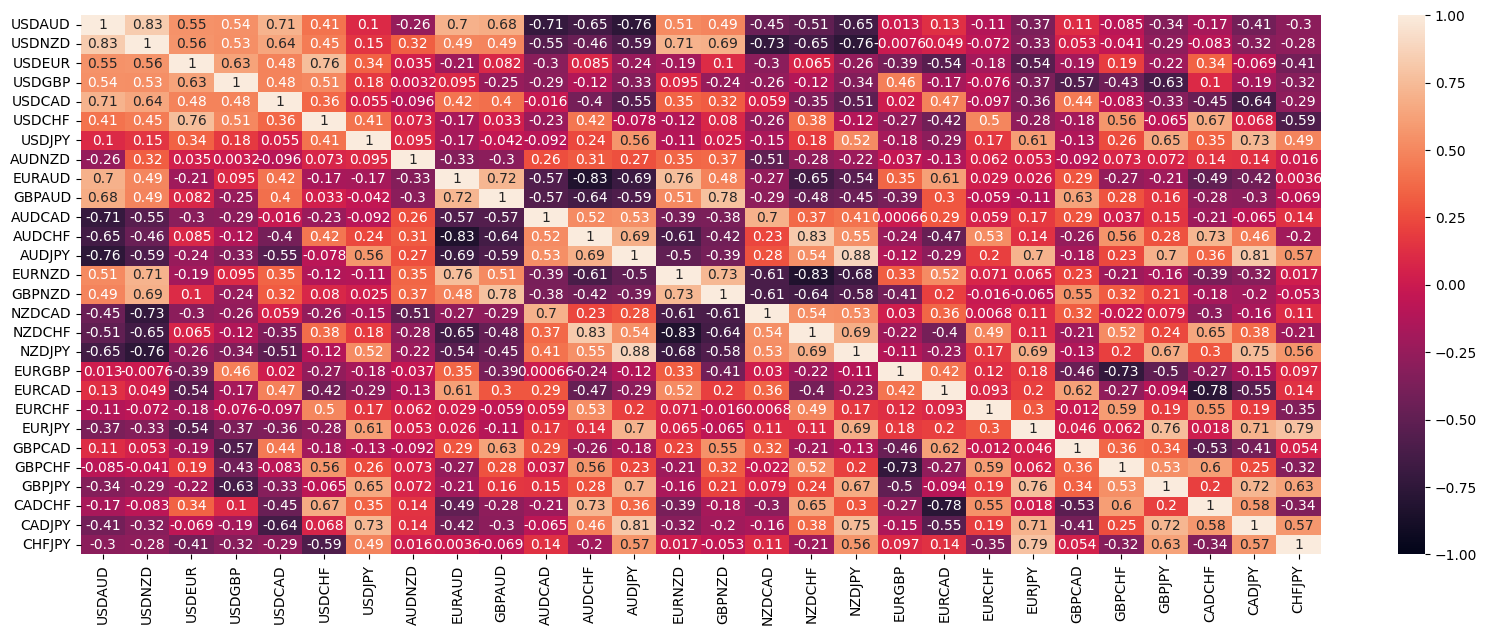

In [2]:
# generate correlation heatmap
plt.figure(figsize=(20, 7))
sns.heatmap(ccy_r.corr(),vmin=-1, vmax=1, annot=True)

There are certain degree of correlation amongst different currency pairs weekly return.  
This implies that certain group of currencies might tend to move in tendom.

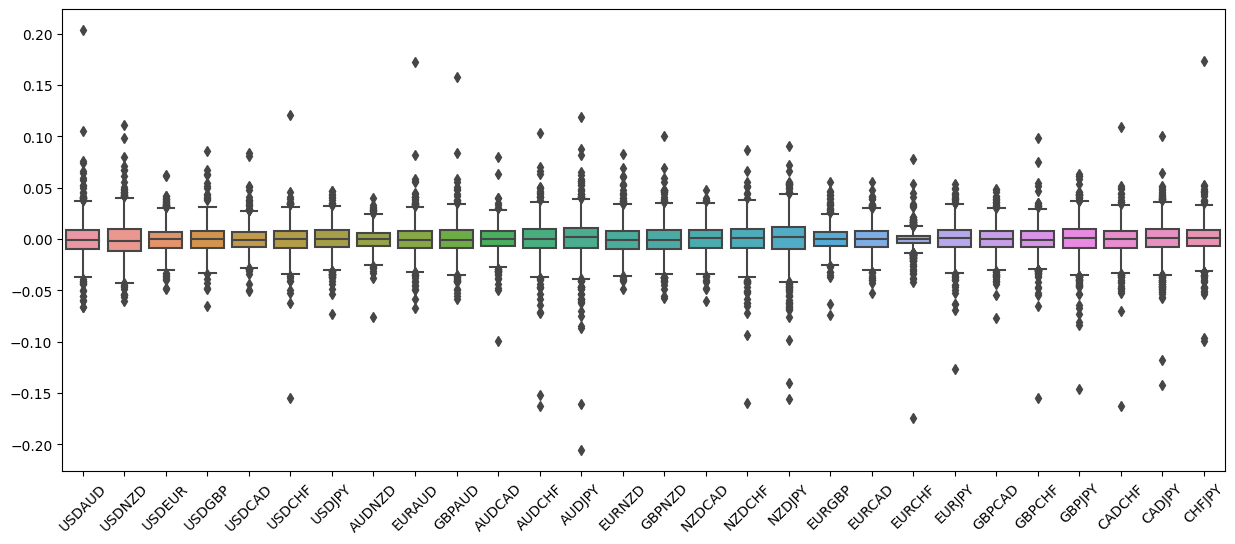

In [3]:
# generate boxplot to identify outliner
plt.figure(figsize=(15,6))
sns.boxplot(data=ccy_r)
plt.xticks(rotation = 45)
plt.show()

Outliners of individiual currency pairs are abundant.  
Not surprising considered the nature of FX market, it tends to be volatile. 

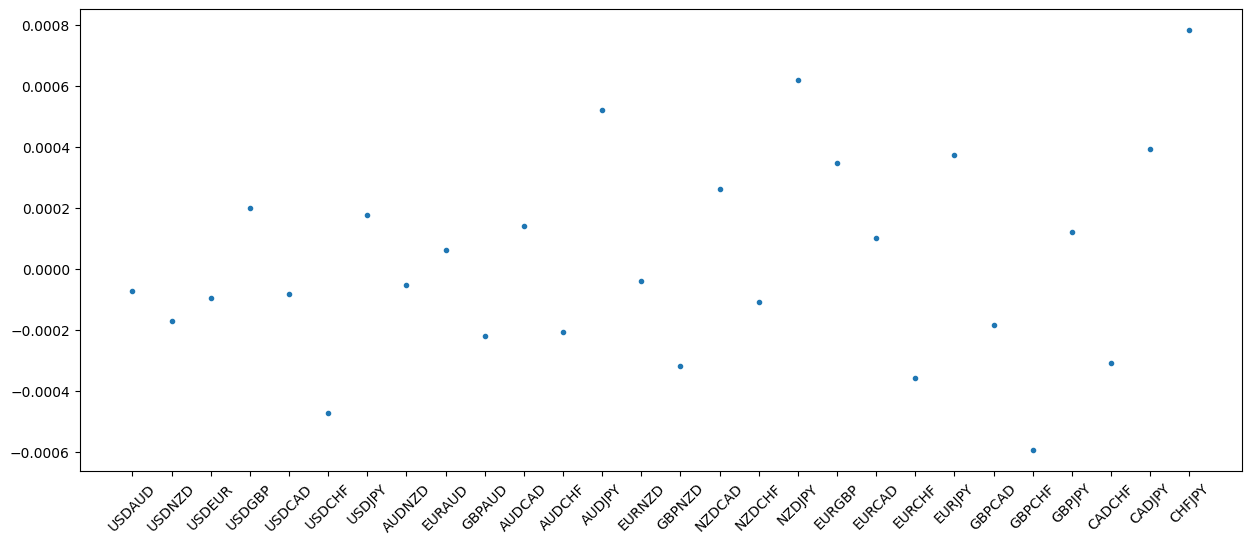

In [4]:
# convert into average weekly return for each currency pairs
ave_weekly = ccy_r.mean(axis=0)

# plot lineplot without the line, to show how each currency pairs relative to one another
plt.figure(figsize=(15,6))
plt.plot(ave_weekly, marker='.',linestyle='None')
plt.xticks(rotation = 45)
plt.show()

The distribution is rather sparse.

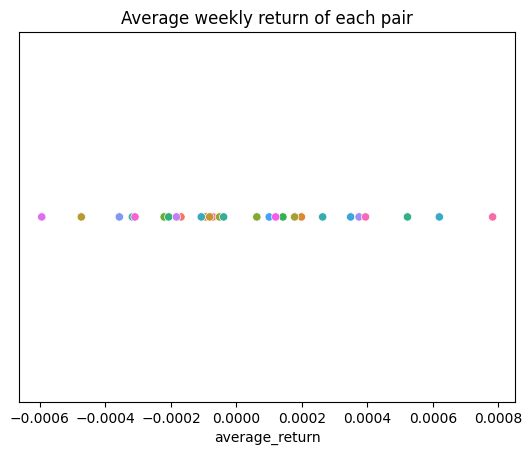

In [5]:
# convert to dataframe
df = pd.DataFrame(ave_weekly)

# reset index and rename columns
df.reset_index(inplace=True)
df.rename(columns={'index':'ccy',
                  0:'average_return'}, inplace=True)

# convert the above plot into a straight line
sns.scatterplot(data=df, x='average_return', y=0, hue='ccy')
plt.legend().remove() # remove legend for simpler presentation
plt.tick_params(left = False, labelleft = False) # remove Y axis for better presentation
plt.title('Average weekly return of each pair')
plt.show()

One might be able to group certain currency pairs together as a cluster

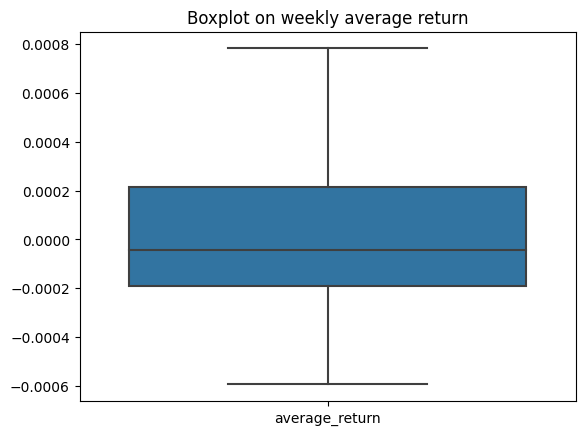

In [6]:
# plot boxplot to detect outliner
sns.boxplot(data=df)
plt.title('Boxplot on weekly average return')
plt.show()

By converting to average weekly return, there are no outliners in the group of currency pairs

In [7]:
df.to_csv('../data/average_weekly.csv', index=False)